## 0.An end to end Scikit-Learn Workflow

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 1.Getting our data ready to be used with machine learning

Three main things we have to do
* Split the data into features and labels (Usually 'X' & 'Y')
* Filling( also called imputing) or disregarding missing values
* Converting non-numerical values to numerical values(also called feature encoding)

In [42]:
# Create X (Feature matrix)
X=heart_disease.drop('target',axis=1)

# create Y(Labels)
Y=heart_disease['target']

* For Structured data use the `RandomForestClassifier` for better result
* For Unstructured data use `deep learning or trasfer learning`

In [43]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
# 3.Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [45]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [46]:
X.shape[0]*0.8

242.4

In [47]:
242+61

303

In [48]:
clf.fit(X_train,Y_train);

In [49]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2


In [50]:
# make a prediction
Y_pred=clf.predict(X_test)
Y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
np.array([Y_test])

array([[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [52]:
# 4. Evaluate the model on the training and test data
clf_single_fold_score=clf.score(X_test,Y_test)
clf_single_fold_score

0.9344262295081968

Evaluating a model using the `scoring` parameter

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,Y,scoring=None,cv=5) #5 random fold

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [54]:
clf_cross_val_score=np.mean(cross_val_score(clf,X,Y,scoring=None,cv=5))
clf_single_fold_score,clf_cross_val_score
# Always pick the cross_val_score beacuase dataset is folded to 
# training and test data randomly 5 times

(0.9344262295081968, 0.8183606557377049)

In [55]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring='accuracy')
cv_acc.mean()

0.8248087431693989

In [56]:
np.random.seed(42)
cv_precision=cross_val_score(clf,X,Y,cv=5,scoring='precision')
cv_precision.mean()

0.8329547346025924

In [57]:
np.random.seed(42)
cv_recall=cross_val_score(clf,X,Y,cv=5,scoring='recall')
cv_recall.mean()

0.8545454545454545

In [58]:
np.random.seed(42)
cv_f1=cross_val_score(clf,X,Y,cv=5,scoring='f1')
cv_f1.mean()

0.8426854603423346

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predict and the actual labels it was supposed to predict.In essence,an idea of where the model is getting confused:

In [79]:
from sklearn.metrics import classification_report,confusion_matrix
# Classification report
classification_report(Y_test,Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.93      0.93        28\n           1       0.94      0.94      0.94        33\n\n    accuracy                           0.93        61\n   macro avg       0.93      0.93      0.93        61\nweighted avg       0.93      0.93      0.93        61\n'

In [60]:
conf_mat=confusion_matrix(Y_test,Y_pred)
conf_mat

array([[26,  2],
       [ 2, 31]], dtype=int64)

In [61]:
#visualize confusion matrix
pd.crosstab(Y_test,Y_pred,rownames=['Actual Labels'],colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,26,2
1,2,31


(2.0, 0.0)

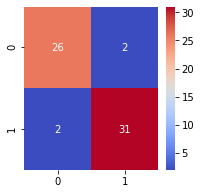

In [62]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(conf_mat,cmap='coolwarm',annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

### Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [81]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
np.random.seed(42)
print(f"Accuracy:{accuracy_score(Y_test,Y_pred)*100:.2f}%")
print(f"Precision:{precision_score(Y_test,Y_pred)*100:.2f}%")
print(f"Recall:{recall_score(Y_test,Y_pred)*100:.2f}%")
print(f"F1:{f1_score(Y_test,Y_pred)*100:.2f}%")

Accuracy:93.44%
Precision:93.94%
Recall:93.94%
F1:93.94%


**Area under the receiver operating characteristic curve(AUC/ROC)**
* Area under curve(AUC)
* ROC curve

**ROC curves are a comparison of a model's true positive & model's false positive rate**
* True Positive=model predict 1 when truth is 1
* False Positive=model predicts 1 when truth is 0
* True negative=model predicts 0 when truth is 0
* False negative=model predicts 0 when truth is 1

In [64]:
from sklearn.metrics import roc_curve
y_probs=clf.predict_proba(X_test)
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.1 , 0.96, 0.55, 0.48, 0.87, 0.86, 0.69, 1.  , 0.24, 0.58])

In [65]:
# Calculate fpr,tpr & thresholds
fpr,tpr,thresholds=roc_curve(Y_test,y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.07142857, 0.07142857,
       0.07142857, 0.17857143, 0.17857143, 0.21428571, 0.28571429,
       0.32142857, 0.39285714, 0.42857143, 0.53571429, 0.64285714,
       0.71428571, 0.78571429, 0.92857143, 1.        ])

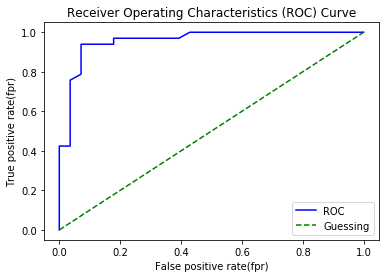

In [66]:
def plot_roc_curve(fpr,tpr):
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, 'b',label='ROC') # blue line
    ax.plot([0,1],[0,1], 'g--',label='Guessing') # green dashed line
    ax.legend()
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate(fpr)')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
plot_roc_curve(fpr,tpr)

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_probs_positive)

0.9577922077922078

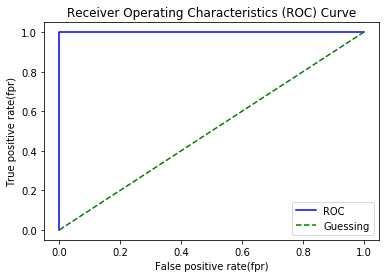

In [68]:
# Plot perfect ROC Curve and AUC score
fpr,tpr,thresholds=roc_curve(Y_test,Y_test)
plot_roc_curve(fpr,tpr)

In [69]:
#Perfect AUC Score
roc_auc_score(Y_test,Y_test)

1.0

In [70]:
# 5.Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,Y_test) * 100}%\n")

Trying model with 10 estimators...
Model accuracy on test set: 86.88524590163934%

Trying model with 20 estimators...
Model accuracy on test set: 86.88524590163934%

Trying model with 30 estimators...
Model accuracy on test set: 88.52459016393442%

Trying model with 40 estimators...
Model accuracy on test set: 88.52459016393442%

Trying model with 50 estimators...
Model accuracy on test set: 90.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 90.1639344262295%

Trying model with 70 estimators...
Model accuracy on test set: 91.80327868852459%

Trying model with 80 estimators...
Model accuracy on test set: 90.1639344262295%

Trying model with 90 estimators...
Model accuracy on test set: 88.52459016393442%



In [71]:
# 6.Save a model and load it
import pickle
pickle.dump(clf,open("rand_forest_model_1.pkl","wb"))

In [72]:
loaded_model=pickle.load(open("rand_forest_model_1.pkl","rb"))
loaded_model.score(X_test,Y_test)

0.8852459016393442

### Let's choose another model for classification

In [73]:
from sklearn.svm import LinearSVC
np.random.seed(42)
svc=LinearSVC(max_iter=10000)
svc.fit(X_train,Y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [74]:
svc.score(X_test,Y_test)

0.8852459016393442

In [75]:
clf.score(X_test,Y_test) # RandomForest

0.8852459016393442

In [76]:
# Another way of predictions by Comparing to truth labels to-
#evaluate a model
y_preds=svc.predict(X_test)
np.mean(y_preds==Y_test)

0.8852459016393442

Make Predictions with `predict_proba()` for each test samples

In [77]:
# predict_proba() returns probabilities of classification label
clf.predict_proba(X_test[:5]) # [Not Heart_disease,heart_disease]

array([[0.93333333, 0.06666667],
       [0.07777778, 0.92222222],
       [0.36666667, 0.63333333],
       [0.47777778, 0.52222222],
       [0.2       , 0.8       ]])

In [78]:
clf.predict(X_test[:5])
#1st sample has probability of not heart_disease is=0.93
#2ns sample has prob of having heart_disease is=0.92

array([0, 1, 1, 1, 1], dtype=int64)

### Improving a model

First predictions=baseline predictions.First model=baseline model.

From a data perspective:
* Could we collect more data?(generally,the more data,the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters=model find these patterns in data
* Hyperparameters=settings on a model that can be adjusted (potentially) improve its ability to find patterns

3 ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### Tuning hyperparameters by hand

Let's make 3 sets:training,validation and test.

In [103]:
def evaluate_preds(y_true,y_preds):
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                "precision":round(precision,2),
                "recall":round(recall,2),
                "f1":round(f1,2)}
    print(f"Accuracy:{accuracy*100:.2f}%")
    print(f"Precision:{precision*100:.2f}%")
    print(f"Recall:{recall*100:.2f}%")
    print(f"F1:{f1*100:.2f}%")
    return metric_dict
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Let's try and adjust these hyperparameters:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [104]:
np.random.seed(42)

#shuffle the data
heart_disease_shuffled=heart_disease.sample(frac=1)

# Split into X & y
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

# Split data into train,validation & test sets
train_split=round(0.7*len(heart_disease_shuffled))
valid_split=round(train_split+0.15*len(heart_disease_shuffled))
X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

# Make baseline predictions
y_preds=clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

Accuracy:80.00%
Precision:76.67%
Recall:92.00%
F1:83.64%


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [105]:
np.random.seed(42)

# Create a 2nd classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

# Make predictions with different hyperparameters
y_preds_2=clf_2.predict(X_valid)

#Evaluate the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Accuracy:82.22%
Precision:84.00%
Recall:84.00%
F1:84.00%
